<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220823_Amazon_Alexa_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/06/12/amazon-alexa-reviews-sentiment-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [6]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/amazon_alexa.tsv", delimiter='\t')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [13]:
ratings = data['rating'].value_counts()
numbers = ratings.index
qty = ratings.values

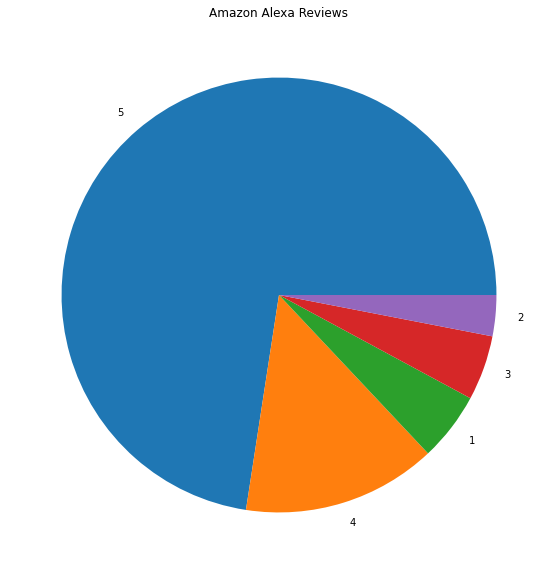

In [14]:
plt.figure(figsize=(15,10))
plt.pie(qty, labels=numbers)
plt.title('Amazon Alexa Reviews')
plt.show()

In [15]:
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['verified_reviews']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['verified_reviews']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['verified_reviews']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['verified_reviews']]

In [16]:
data.head()

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral,Compound
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308,0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193,0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784,-0.1280
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617,0.9169
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000,0.0000


In [18]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])
c = sum(data['Compound'])

In [19]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)
print('Compound: ', c)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996
Compound:  1664.9914999999937


In [20]:
def sent_analysis(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [21]:
sent_analysis(x,y,z)

Neutral
